# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import Methods as Md
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
X,y = DS.LoadData('BreastCancer')

In [4]:
X.shape

(569, 30)

In [5]:
np.unique(y)

array([0, 1], dtype=int64)

# Applying T-SNE

In [6]:
X_tsne = Md.UseMethod('TSNE', X)

# Plotting the results

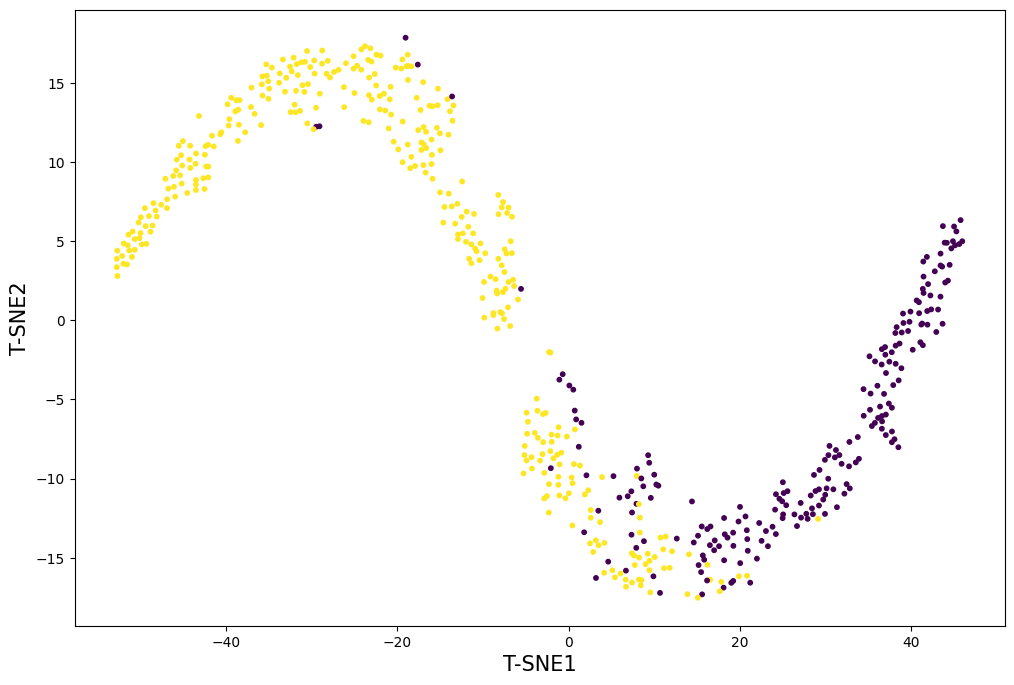

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=10)
plt.xlabel("T-SNE1", fontsize = 15)
plt.ylabel("T-SNE2", fontsize = 15)
plt.savefig(dir+'BreastCancer_tSNE.eps', dpi = 1200, format = 'eps')

# Applying UMAP

In [8]:
X_umap = Md.UseMethod('UMAP', X)

# Plotting the results

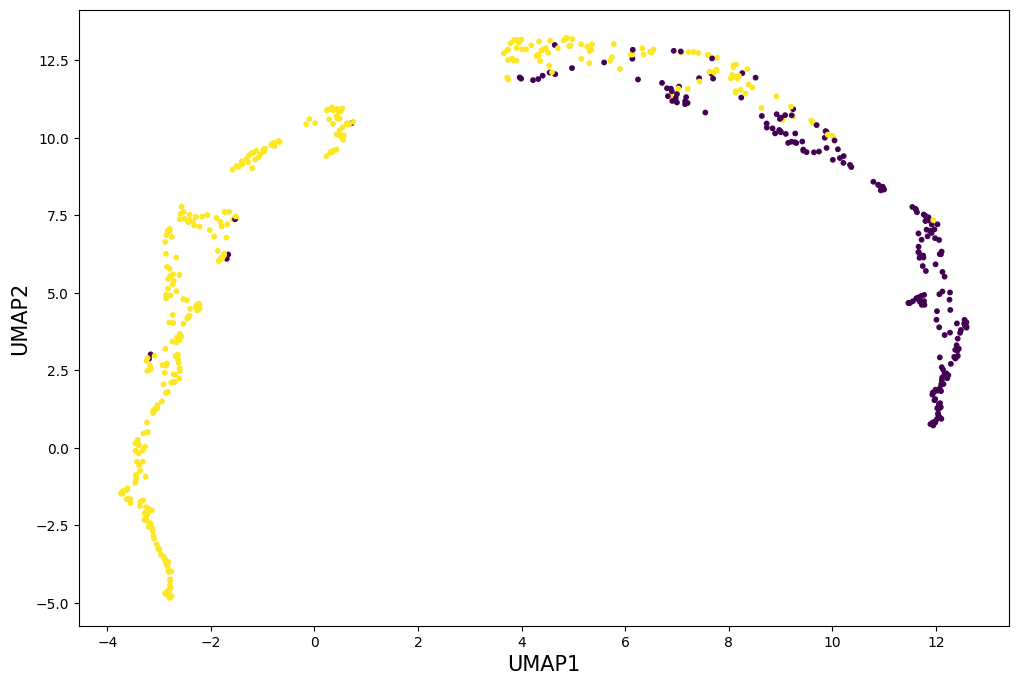

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X_umap[:,0],X_umap[:,1],c=y,s=10)
plt.xlabel("UMAP1", fontsize = 15)
plt.ylabel("UMAP2", fontsize = 15)
plt.savefig(dir+'BreastCancer_UMAP.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [10]:
iteration = 10
score_tsne = []
score_umap = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    print("----TSNE")
    X_tsne = Md.UseMethod('TSNE', X)
    dist_method = np.square(euclidean_distances(X_tsne, X_tsne)).flatten()
    score_tsne.append(DA.correlation(dist_orig, dist_method))
    print("----UMAP")
    X_umap = Md.UseMethod('UMAP', X)
    dist_method = np.square(euclidean_distances(X_umap, X_umap)).flatten()
    score_umap.append(DA.correlation(dist_orig, dist_method))

Iteration 1
----TSNE
----UMAP
Iteration 2
----TSNE
----UMAP
Iteration 3
----TSNE
----UMAP
Iteration 4
----TSNE
----UMAP
Iteration 5
----TSNE
----UMAP
Iteration 6
----TSNE
----UMAP
Iteration 7
----TSNE
----UMAP
Iteration 8
----TSNE
----UMAP
Iteration 9
----TSNE
----UMAP
Iteration 10
----TSNE
----UMAP


In [11]:
result = pd.DataFrame(list(zip(score_tsne, score_umap)),
               columns =['T-SNE','Umap'])
result

,T-SNE,Umap
0,0.769952,0.770264
1,0.736183,0.758675
2,0.740922,0.767776
3,0.761215,0.810218
4,0.784672,0.782536
5,0.753454,0.788057
6,0.738029,0.787482
7,0.799904,0.825662
8,0.776288,0.725127
9,0.788058,0.740285
